# The Iris Dataset
## About
The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other. -[Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set)


# Exploratory Data Analysis
## Previewing the dataset

In [1]:
from sklearn.datasets import load_iris
from jupyterthemes import jtplot
jtplot.style()
data = load_iris()

In [2]:
# display what each species is encoded as
print(data.target)
shape = data.data.shape
print("{} datapoints for the {} available features".format(shape[0], shape[1]))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
150 datapoints for the 4 available features


In [3]:
features = data.feature_names
species = data.target_names
print("Features available:")
for name in features:
    print("\t-", name)
print("Species to be identified:")
for name in species:
    print("\t-",name)

Features available:
	- sepal length (cm)
	- sepal width (cm)
	- petal length (cm)
	- petal width (cm)
Species to be identified:
	- setosa
	- versicolor
	- virginica


According to above code, the Iris dataset contains 150 datapoints with 4 available features, as well as the three iris species: _setosa, versicolor_ and _virginica_. These species have datapoints that include their sepal length and width, as well as their petal length and width. 

- _Setosa_ is denoted by a __0__<br>
- _Versicolor_ is denoted by a __1__<br>
- _Virginica_ is denoted by a __2__

## Visualization

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

### Sepal Comparisons
Code snippet also found @ [sklearn's documentation site](#https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

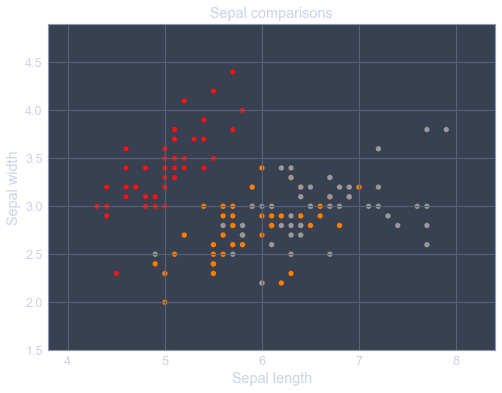

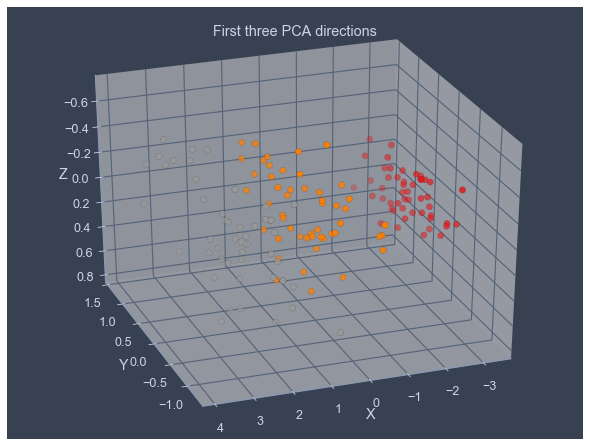

In [5]:
X = data.data[:, :2]
y = data.target

####################### 2D PLOT ######################
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.title('Sepal comparisons')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

############# 3D Plot #############
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(data.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.show()

### Petal Comparisons

# Making Predictions
## K-Nearest neighbors 

In [6]:
from yellowbrick.classifier import ConfusionMatrix

In [7]:
from sklearn.cross_validation import train_test_split

def gen_cf(model):
    cm = ConfusionMatrix(model, classes=data.target_names, label_encoder={0: 'setosa', 1: 'versicolor', 2: 'virginica'})
    cm.fit(X_train, y_train)
    cm.score(X_test, y_test)
    cm.poof()
    
    
X = data.data
y = data.target

accuracy = {}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
from sklearn.neighbors import KNeighborsClassifier

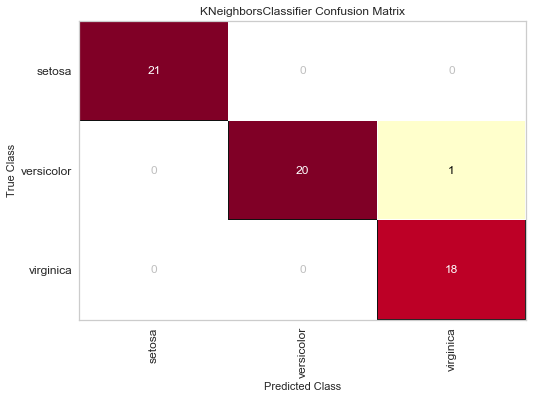

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
gen_cf(knn)
accuracy['knn'] = knn.score(X_test, y_test)

## Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

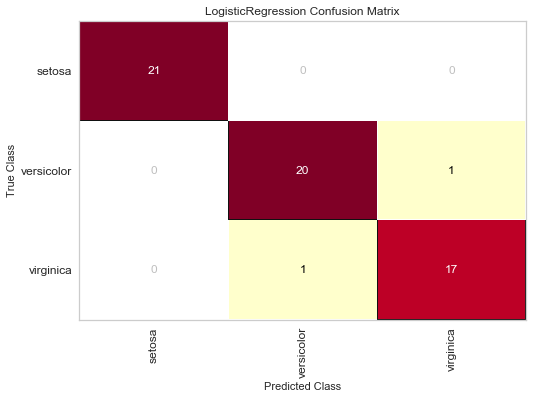

In [11]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
gen_cf(lr)
accuracy['lr'] = lr.score(X_test, y_test)

## Decision Trees

In [12]:
from sklearn.tree import DecisionTreeClassifier

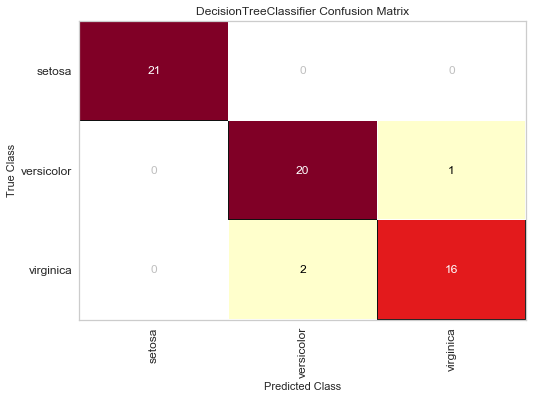

In [13]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
gen_cf(dt)
accuracy['dt'] = dt.score(X_test, y_test)

### SVM

In [14]:
from sklearn.svm import SVC

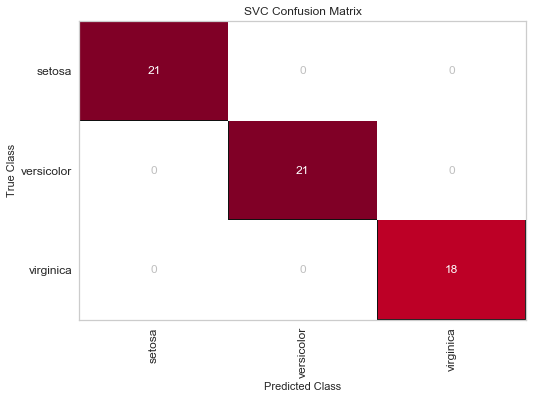

In [15]:
svm = SVC()
svm.fit(X_train, y_train)
gen_cf(svm)
accuracy['svm'] = svm.score(X_test, y_test)

# Conclusion about classifiers

It's clear that, according to the above classifiers, KNN is the best option. Logistic Regression and Decision Trees were only used here for comparison, __not__ for any other reason based on the data.